In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import sqlite3

In [2]:
cnx = sqlite3.connect("../data/hiv.db")
# data = pd.read_excel("../data/HIV.xlsx")
# display(data)

In [3]:
data = pd.read_sql_query("""
SELECT 
    H.Country AS Country,
    H.Year,
    H.Deaths,
    H.`New Cases`,
    H.`Women's share (%)`,
    H.`HIV Under 5 (%)`,
    C.Population,
    C.GDP,
    C.Unemployment
FROM 
    hiv_data H 
JOIN 
    countries C 
ON 
    H.Country = C.Country 
    AND H.Year = C.Year;
""", cnx)


In [70]:
print(display(data))

,Country,Year,Deaths,New Cases,Women's share (%),HIV Under 5 (%),Population,GDP,Unemployment
0,Germany,2007,563,2340,17.538951,0.002978,82266372,3.114246,8.732
1,Germany,2008,561,2302,17.388836,0.002729,82110097,1.152030,7.508
2,Germany,2009,548,2183,17.265103,0.002687,81902307,-5.454577,7.880
3,Germany,2010,552,2097,17.388826,0.002751,81776930,4.339607,7.043
4,Germany,2011,567,2031,17.524362,0.002757,80274983,5.869636,5.967
5,Germany,2012,521,1995,17.664018,0.002769,80425823,0.230161,5.372
6,Germany,2013,513,2011,17.858871,0.002803,80645605,0.163871,5.316
7,Germany,2014,493,2052,18.083055,0.002819,80982500,1.784342,4.980
8,Germany,2015,511,2046,18.365204,0.002645,81686611,0.617105,4.612
9,Germany,2016,467,2137,18.618920,0.002126,82348669,1.408102,4.104


None


In [71]:
print(data.describe())

              Year       Deaths    New Cases  Women's share (%)  \
count    30.000000    30.000000    30.000000          30.000000   
mean   2011.500000   640.566667  2544.133333          25.589586   
std       2.921384   163.643364   462.461311           6.097170   
min    2007.000000   429.000000  1995.000000          17.265103   
25%    2009.000000   511.500000  2208.500000          18.153592   
50%    2011.500000   565.000000  2356.500000          26.754526   
75%    2014.000000   767.750000  2866.000000          32.020918   
max    2016.000000  1027.000000  3500.000000          32.846841   

       HIV Under 5 (%)    Population        GDP  Unemployment  
count        30.000000  3.000000e+01  30.000000     30.000000  
mean          0.002050  6.886984e+07   0.241431      8.377233  
std           0.000748  9.391391e+06   2.495960      2.340482  
min           0.000727  5.843831e+07  -5.711508      4.104000  
25%           0.001324  6.065327e+07  -0.269653      6.803000  
50%         

In [72]:
def plot_column(data, column_name):
    """
    Plots a line graph for a specified column across countries and years.

    Parameters:
    - data: DataFrame containing the data
    - column_name: Column name (string) to be plotted

    Returns:
    - A line plot for the specified column
    """
    # Ensure required columns exist
    required_columns = ["Country", "Year", column_name]
    for col in required_columns:
        if col not in data.columns:
            raise KeyError(f"Missing required column: '{col}' in the DataFrame.")

    # Debugging unique values
    unique_countries = data["Country"].unique()
    print("Unique countries in data:", unique_countries)

    # Plot the data
    plt.figure(figsize=(12, 6))
    for country in unique_countries:
        subset = data[data["Country"] == country]
        plt.plot(subset["Year"], subset[column_name], marker='o', label=country)

    plt.title(f"{column_name} Over Years by Country", fontsize=16)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(column_name, fontsize=12)
    plt.legend(title="Country")
    plt.grid()
    plt.show()


Unique countries in data: ['Germany' 'France' 'Italy']


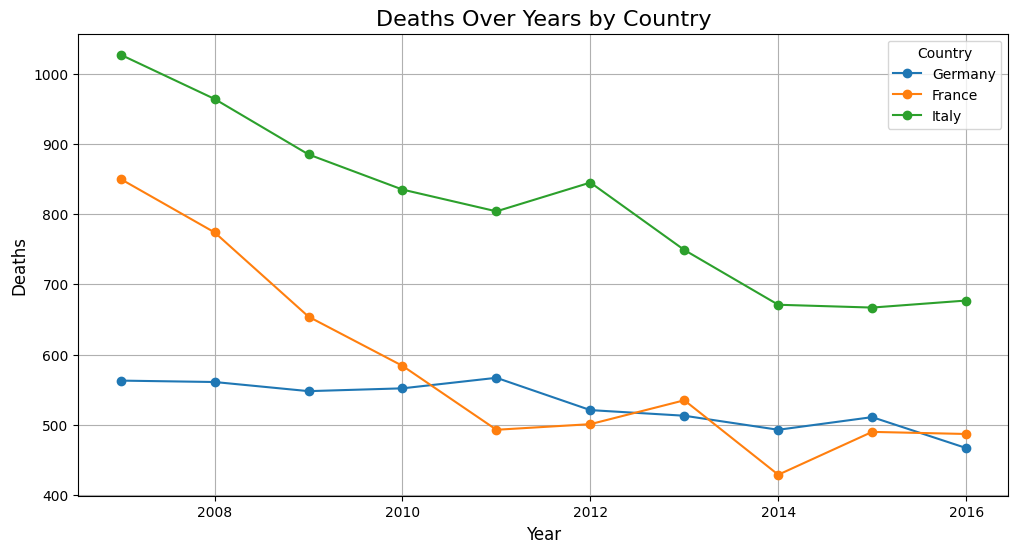

Unique countries in data: ['Germany' 'France' 'Italy']


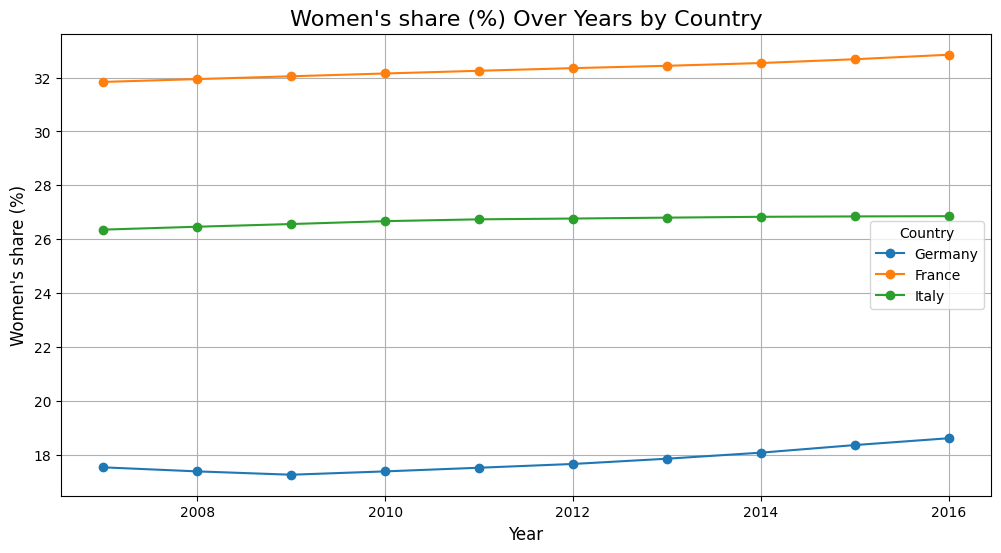

Unique countries in data: ['Germany' 'France' 'Italy']


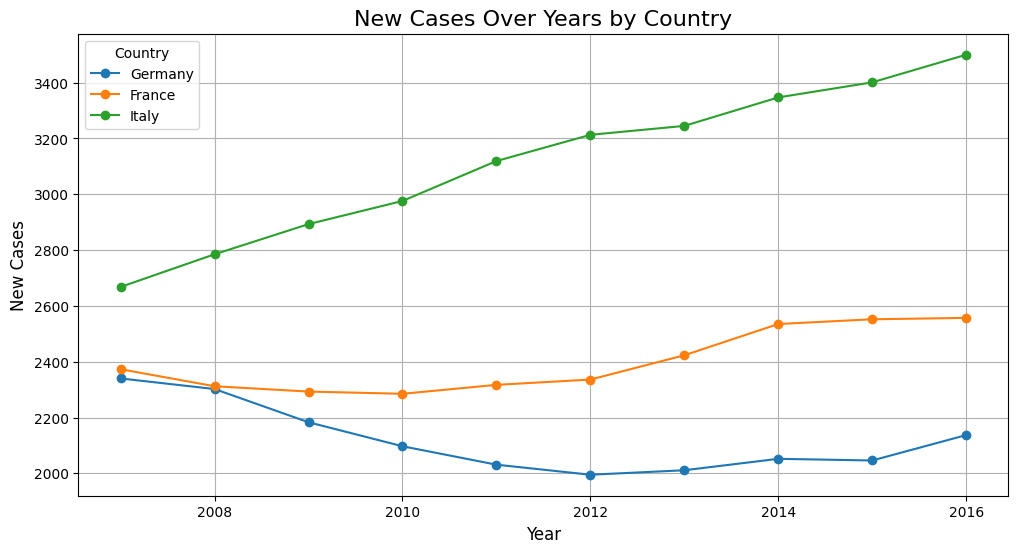

In [76]:
plot_column(data, "Deaths")
plot_column(data, "Women's share (%)")
plot_column(data, "New Cases")